In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
df_DA_US = df[(df['job_country'] == 'United States') & (df['job_title_short'] == 'Data Analyst')].copy()

In [4]:
df_DA_US['job_location'].value_counts().head(10)

job_location
Anywhere           5106
New York, NY       3035
Atlanta, GA        2741
Chicago, IL        2337
Austin, TX         1919
Dallas, TX         1862
Washington, DC     1592
Charlotte, NC      1433
Tampa, FL          1431
Los Angeles, CA    1328
Name: count, dtype: int64

In [5]:
#set the EDA (Exploratory Data Analysis) above to a dataframe:
df_plot = df_DA_US['job_location'].value_counts().head(10).to_frame()

<Axes: xlabel='count', ylabel='job_location'>

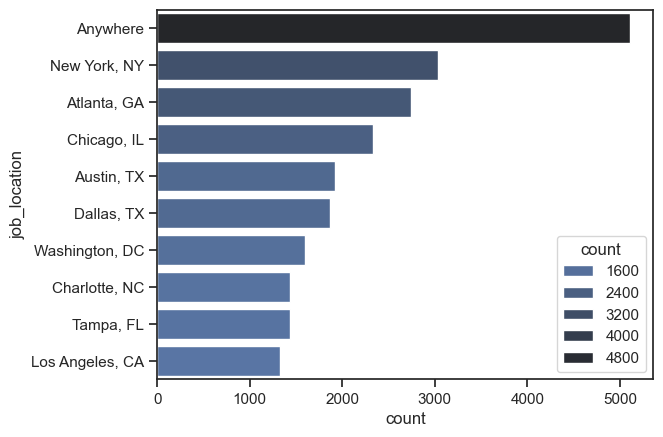

In [10]:
#we can do basic plot of our dataframe using seaborn:

#initial plot
sns.barplot(data=df_plot, x='count', y='job_location')

#cleaned up plot adding hue and palette
sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_location', hue='count', palette='dark:b_r')

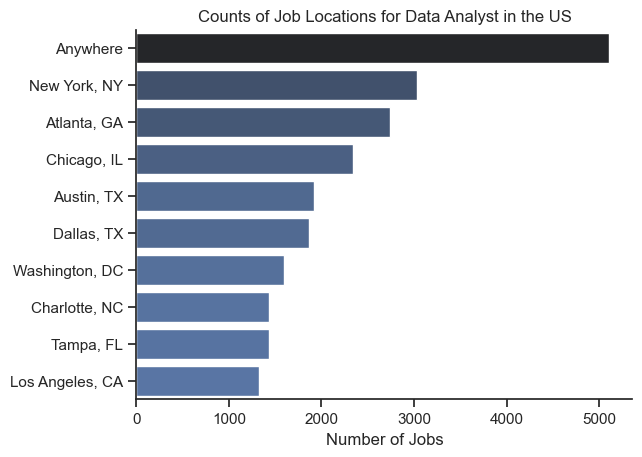

In [12]:
#further clean up of plot with removing the legend and clean up of axis labels
sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_location', hue='count', palette='dark:b_r', legend=False)
sns.despine() #removes the plot border
plt.title('Counts of Job Locations for Data Analyst in the US')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

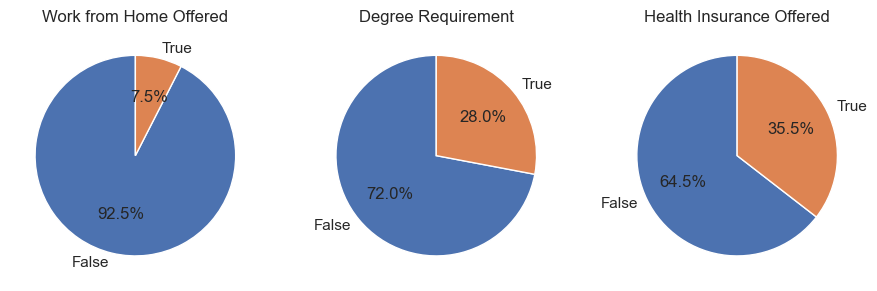

In [13]:
dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}

fig, ax = plt.subplots(1, 3, figsize=(11, 3.5))
#Alternatively:
#fis, ax = plt.subplots(1, 3)
#fig.set_size_inches((11, 3.5))

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df_DA_US[column].value_counts(), labels=['False', 'True'], autopct='%1.1f%%', startangle=90)
    ax[i].set_title(title)

plt.show()

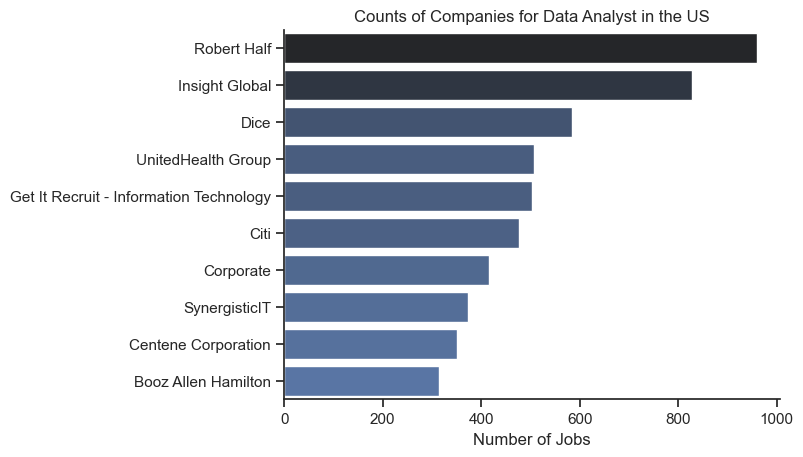

In [14]:
df_plot = df_DA_US['company_name'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='company_name', hue='count', palette='dark:b_r', legend=False)
sns.despine() #removes the plot border
plt.title('Counts of Companies for Data Analyst in the US')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()